In [13]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import pandas as pd
import pickle
from datetime import datetime
from glob import glob
from scipy.interpolate import interp1d

In [14]:
dir = "//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/"

In [15]:
a12_diag1_1 = ert.load(dir + 'raw_data/tuktuk_a12_diag1_01.txt')
a12_diag2_1 = ert.load(dir + 'raw_data/tuktuk_a12_diag2_01.txt')

a12_diag1_topo = pd.read_csv(dir + 'topo_data/tuktuk_a12_diag1_topo.txt', sep='\s+', header=None)
a12_diag2_topo = pd.read_csv(dir + 'topo_data/tuktuk_a12_diag2_topo.txt', sep='\s+', header=None)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21f9c799690>)

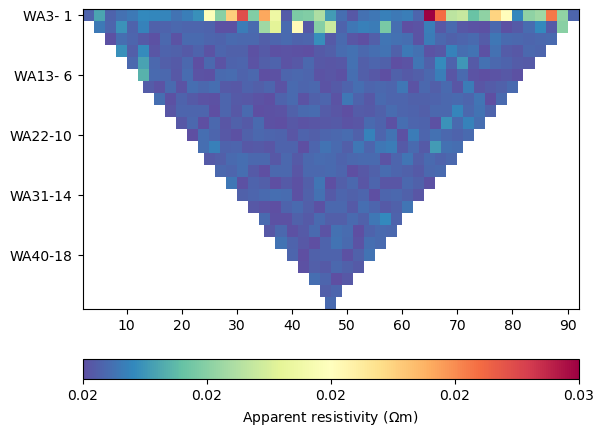

In [16]:

a12_diag1_1['err'] = a12_diag1_1['err'] + 0.02

ert.show(a12_diag1_1, a12_diag1_1['err'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21fa65f3b50>)

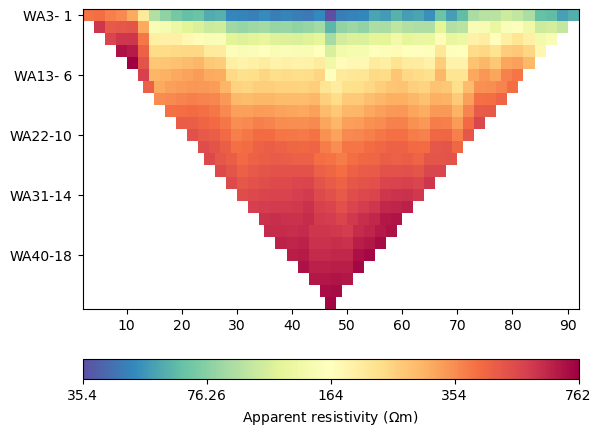

In [17]:
ert.showData(a12_diag1_1)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21fa6a418d0>)

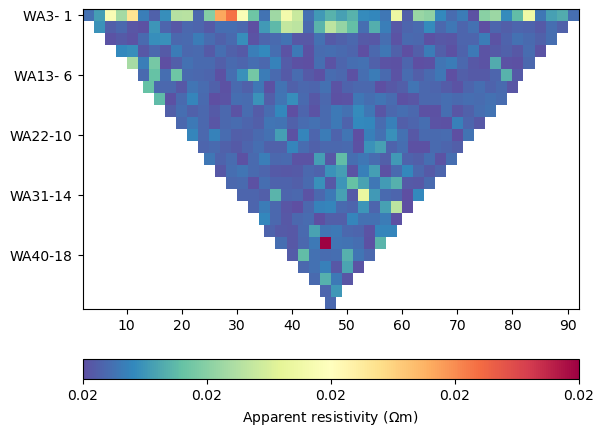

In [18]:
a12_diag2_1['err'] = a12_diag2_1['err'] + 0.02
ert.show(a12_diag2_1, a12_diag2_1['err'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21fa6daae50>)

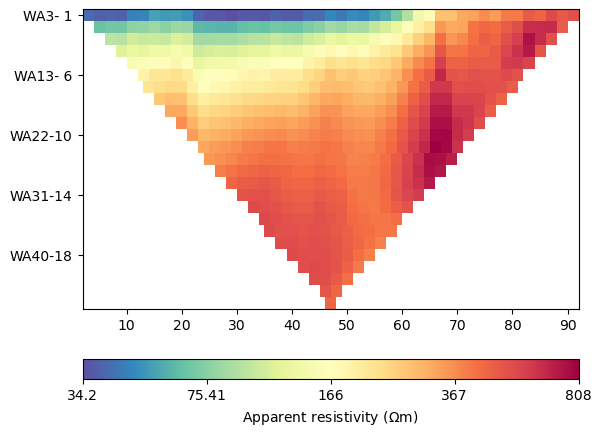

In [19]:
ert.showData(a12_diag2_1)

In [20]:
a12_diag1_1["k0"] = ert.createGeometricFactors(a12_diag1_1)
a12_diag1_1["r"] = a12_diag1_1["rhoa"]/a12_diag1_1["k0"]

for i in range(a12_diag1_1.sensorCount()):
    x_new = a12_diag1_topo[0][i]  
    y_new = a12_diag1_topo[1][i]  
    a12_diag1_1.setSensorPosition(i, [x_new, y_new])

a12_diag1_1["k"] = ert.createGeometricFactors(a12_diag1_1, numerical=True)
a12_diag1_1["r"] = a12_diag1_1["rhoa"]/a12_diag1_1["k"]

23/07/25 - 13:58:52 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2714335035660249266
23/07/25 - 13:58:53 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.9s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5371865599294547287


In [21]:
mgr = ert.Manager(a12_diag1_1)
lambdas = np.logspace(np.log10(1000), np.log10(10), num=30)
phiD = []
phiM = []

for lam in lambdas:
    mgr.invert(a12_diag1_1, zWeight=0.5, lam=lam, verbose=True)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())

phiD = np.array(phiD)
phiM = np.array(phiM)



23/07/25 - 13:58:57 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 13:58:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 13:58:57 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 13:58:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 13:58:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/07/25 - 13:58:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/07/25 - 13:58:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2108 Cells: 3956 Boundaries: 3096
23/07/25 - 13:58:57 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 13:58:57 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 13:58:57 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  142.01 (dPhi = 85.77%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   23.78 (dPhi = 61.17%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   16.69 (dPhi = 14.28%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

23/07/25 - 13:59:15 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 13:59:15 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 13:59:15 - pyGIMLi - INFO - Starting inversion.


chi² =   16.63 (dPhi = 0.01%) lam: 1000.0
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  141.20 (dPhi = 86.03%) lam: 853.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   24.44 (dPhi = 62.85

23/07/25 - 13:59:34 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 13:59:34 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 13:59:34 - pyGIMLi - INFO - Starting inversion.


chi² =   14.13 (dPhi = -0.00%) lam: 853.2
################################################################################
#                Abort criterion reached: dPhi = -0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  137.94 (dPhi = 86.52%) lam: 727.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   26.27 (dPhi = 63.00

23/07/25 - 14:00:04 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:00:04 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:00:04 - pyGIMLi - INFO - Starting inversion.


chi² =   12.15 (dPhi = 0.01%) lam: 727.9
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  137.33 (dPhi = 86.72%) lam: 621.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   27.68 (dPhi = 63.88%

23/07/25 - 14:00:22 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:00:22 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:00:22 - pyGIMLi - INFO - Starting inversion.


chi² =   10.66 (dPhi = 0.07%) lam: 621.0
################################################################################
#                Abort criterion reached: dPhi = 0.07 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  134.34 (dPhi = 87.14%) lam: 529.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   30.27 (dPhi = 63.17%

23/07/25 - 14:00:39 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:00:39 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:00:39 - pyGIMLi - INFO - Starting inversion.


chi² =    9.41 (dPhi = 0.18%) lam: 529.8
################################################################################
#                Abort criterion reached: dPhi = 0.18 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  133.98 (dPhi = 87.29%) lam: 452.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   32.28 (dPhi = 63.30%

23/07/25 - 14:00:56 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:00:56 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:00:56 - pyGIMLi - INFO - Starting inversion.


chi² =    8.35 (dPhi = 0.32%) lam: 452.0
################################################################################
#                Abort criterion reached: dPhi = 0.32 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  131.27 (dPhi = 87.65%) lam: 385.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   35.44 (dPhi = 61.80%

23/07/25 - 14:01:20 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:01:20 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:01:20 - pyGIMLi - INFO - Starting inversion.


chi² =    7.42 (dPhi = 0.49%) lam: 385.7
################################################################################
#                Abort criterion reached: dPhi = 0.49 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  131.13 (dPhi = 87.75%) lam: 329.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   37.93 (dPhi = 61.27%

23/07/25 - 14:01:41 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:01:41 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:01:41 - pyGIMLi - INFO - Starting inversion.


chi² =    6.59 (dPhi = 0.76%) lam: 329.0
################################################################################
#                Abort criterion reached: dPhi = 0.76 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  128.70 (dPhi = 88.05%) lam: 280.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   41.44 (dPhi = 59.15%

23/07/25 - 14:02:02 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:02:02 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:02:02 - pyGIMLi - INFO - Starting inversion.


chi² =    5.87 (dPhi = 0.98%) lam: 280.7
################################################################################
#                Abort criterion reached: dPhi = 0.98 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  128.74 (dPhi = 88.12%) lam: 239.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   44.19 (dPhi = 58.14%

23/07/25 - 14:02:23 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:02:23 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:02:23 - pyGIMLi - INFO - Starting inversion.


chi² =    5.24 (dPhi = 1.17%) lam: 239.5
################################################################################
#                Abort criterion reached: dPhi = 1.17 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  126.54 (dPhi = 88.39%) lam: 204.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   47.82 (dPhi = 55.59%

23/07/25 - 14:02:49 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:02:49 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:02:49 - pyGIMLi - INFO - Starting inversion.


chi² =    4.67 (dPhi = 1.46%) lam: 204.3
################################################################################
#                Abort criterion reached: dPhi = 1.46 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  126.69 (dPhi = 88.43%) lam: 174.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   50.67 (dPhi = 54.26%

23/07/25 - 14:03:13 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:03:13 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:03:13 - pyGIMLi - INFO - Starting inversion.


chi² =    4.16 (dPhi = 1.77%) lam: 174.3
################################################################################
#                Abort criterion reached: dPhi = 1.77 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  124.72 (dPhi = 88.66%) lam: 148.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   54.21 (dPhi = 51.51%

23/07/25 - 14:03:42 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:03:42 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:03:42 - pyGIMLi - INFO - Starting inversion.


chi² =    3.66 (dPhi = 0.72%) lam: 148.7
################################################################################
#                Abort criterion reached: dPhi = 0.72 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  124.90 (dPhi = 88.69%) lam: 126.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   57.06 (dPhi = 49.96%

23/07/25 - 14:04:04 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:04:04 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:04:04 - pyGIMLi - INFO - Starting inversion.


chi² =    3.24 (dPhi = 0.92%) lam: 126.9
################################################################################
#                Abort criterion reached: dPhi = 0.92 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  125.17 (dPhi = 88.70%) lam: 108.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   59.89 (dPhi = 48.38%

23/07/25 - 14:04:23 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:04:23 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:04:23 - pyGIMLi - INFO - Starting inversion.


chi² =    2.87 (dPhi = 0.53%) lam: 108.3
################################################################################
#                Abort criterion reached: dPhi = 0.53 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  123.29 (dPhi = 88.91%) lam: 92.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   63.17 (dPhi = 45.46%)

23/07/25 - 14:04:44 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:04:44 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:04:44 - pyGIMLi - INFO - Starting inversion.


chi² =    2.55 (dPhi = 0.85%) lam: 92.4
################################################################################
#                Abort criterion reached: dPhi = 0.85 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  123.52 (dPhi = 88.92%) lam: 78.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   65.94 (dPhi = 43.75%) 

23/07/25 - 14:05:04 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:05:04 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:05:04 - pyGIMLi - INFO - Starting inversion.


chi² =    2.27 (dPhi = 1.15%) lam: 78.8
################################################################################
#                Abort criterion reached: dPhi = 1.15 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  123.74 (dPhi = 88.92%) lam: 67.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   68.76 (dPhi = 41.95%) 

23/07/25 - 14:05:23 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:05:23 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:05:23 - pyGIMLi - INFO - Starting inversion.


chi² =    2.02 (dPhi = 1.49%) lam: 67.2
################################################################################
#                Abort criterion reached: dPhi = 1.49 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  122.03 (dPhi = 89.10%) lam: 57.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   71.94 (dPhi = 38.88%) 

23/07/25 - 14:05:46 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:05:46 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:05:46 - pyGIMLi - INFO - Starting inversion.


chi² =    1.72 (dPhi = 1.47%) lam: 57.4
################################################################################
#                Abort criterion reached: dPhi = 1.47 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  122.18 (dPhi = 89.11%) lam: 48.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   74.91 (dPhi = 36.80%) 

23/07/25 - 14:06:11 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:06:11 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:06:11 - pyGIMLi - INFO - Starting inversion.


chi² =    1.51 (dPhi = 0.03%) lam: 48.9
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  122.39 (dPhi = 89.11%) lam: 41.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   78.02 (dPhi = 34.63%) 

23/07/25 - 14:06:37 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:06:37 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:06:37 - pyGIMLi - INFO - Starting inversion.


chi² =    1.32 (dPhi = 0.01%) lam: 41.8
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  120.75 (dPhi = 89.27%) lam: 35.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   81.82 (dPhi = 30.82%) 

23/07/25 - 14:07:04 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:07:04 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:07:04 - pyGIMLi - INFO - Starting inversion.


chi² =    1.16 (dPhi = 0.04%) lam: 35.6
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  120.86 (dPhi = 89.28%) lam: 30.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   74.40 (dPhi = 37.25%) 

23/07/25 - 14:07:31 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:07:31 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:07:31 - pyGIMLi - INFO - Starting inversion.


chi² =    1.03 (dPhi = 0.08%) lam: 30.4
################################################################################
#                Abort criterion reached: dPhi = 0.08 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  120.93 (dPhi = 89.28%) lam: 25.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   72.53 (dPhi = 39.02%) 

23/07/25 - 14:08:00 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:08:00 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:08:00 - pyGIMLi - INFO - Starting inversion.


chi² =    0.90 (dPhi = 14.87%) lam: 25.9


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.90)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  119.54 (dPhi = 89.42%) lam: 22.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   66.52 (dPhi = 43.52

23/07/25 - 14:08:26 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:08:26 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:08:26 - pyGIMLi - INFO - Starting inversion.


chi² =    0.84 (dPhi = 45.69%) lam: 22.1


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.84)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  119.62 (dPhi = 89.42%) lam: 18.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   65.56 (dPhi = 44.51

23/07/25 - 14:08:49 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:08:49 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:08:49 - pyGIMLi - INFO - Starting inversion.


chi² =    4.57 (dPhi = 25.39%) lam: 18.9
--------------------------------------------------------------------------------
inv.iter 5 ... chi² =    0.79 (dPhi = 55.70%) lam: 18.9


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.79)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  119.66 (dPhi = 89.42

23/07/25 - 14:09:10 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:09:10 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:09:10 - pyGIMLi - INFO - Starting inversion.


chi² =    0.72 (dPhi = 64.87%) lam: 16.1


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.72)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  119.76 (dPhi = 89.42%) lam: 13.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   66.28 (dPhi = 44.21

23/07/25 - 14:09:30 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:09:30 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:09:30 - pyGIMLi - INFO - Starting inversion.


chi² =    0.63 (dPhi = 70.57%) lam: 13.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.63)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  118.61 (dPhi = 89.53%) lam: 11.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   66.40 (dPhi = 43.66

23/07/25 - 14:09:50 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:09:50 - pyGIMLi - INFO - Created startmodel from forward operator:767, min/max=323.872000/323.872000
23/07/25 - 14:09:50 - pyGIMLi - INFO - Starting inversion.


chi² =    0.58 (dPhi = 68.31%) lam: 11.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.58)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F9C7FD5D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  118.73 (dPhi = 89.53%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   69.13 (dPhi = 41.50

39.183
1830.686
[126.89610032]


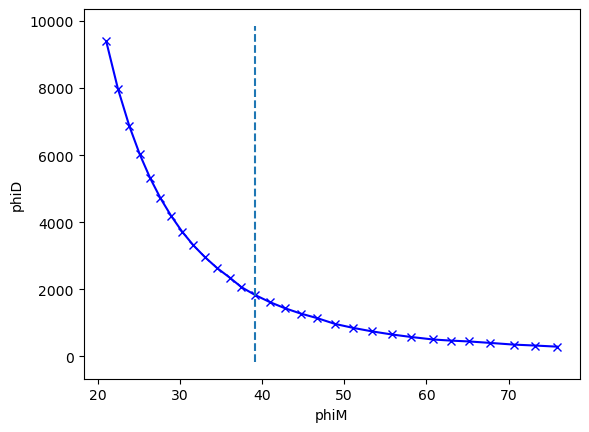

In [22]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=3)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas[np.where(phiM==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [23]:
lambdas

array([1000.        ,  853.16785242,  727.8953844 ,  621.01694189,
        529.83169063,  452.03536564,  385.66204212,  329.03445623,
        280.72162039,  239.502662  ,  204.33597179,  174.33288222,
        148.73521073,  126.89610032,  108.26367339,   92.36708572,
         78.80462816,   67.23357536,   57.3615251 ,   48.93900918,
         41.75318937,   35.6224789 ,   30.39195382,   25.92943797,
         22.12216291,   18.87391822,   16.10262028,   13.73823796,
         11.72102298,   10.        ])

23/07/25 - 14:22:05 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 14:22:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 14:22:05 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 14:22:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 14:22:06 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/07/25 - 14:22:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/07/25 - 14:22:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4486 Cells: 8716 Boundaries: 6664
23/07/25 - 14:22:06 - pyGIMLi - INFO - Use median(data values)=323.872
23/07/25 - 14:22:06 - pyGIMLi - INFO - Created startmodel from forward operator:1706, min/max=323.872000/323.872000
23/07/25 - 14:22:06 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021FBF95ECF0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 35.4/762
min/max (error): 2%/2.53%
min/max (start model): 324/324
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1138.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  125.09 (dPhi = 88.68%) lam: 125.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   56.39 (dPhi = 50.68%) lam: 125.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.39 (dPhi = 80.73%) lam: 125.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.12 (dPhi = 4.04%) lam: 12

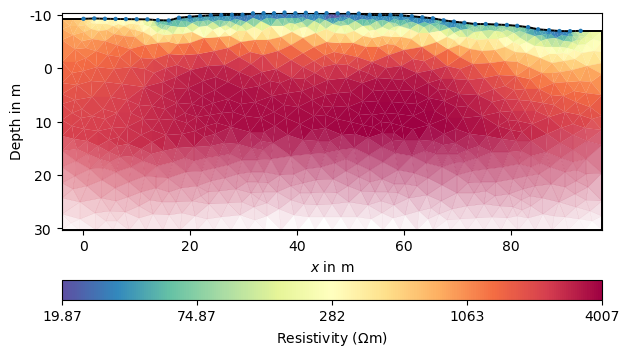

In [26]:
mgr = ert.Manager(a12_diag1_1)
mgr.invert(zWeight=0.5, verbose=True, paraMaxCellSize=5.0, lam=125)
ax, cb = mgr.showResult()

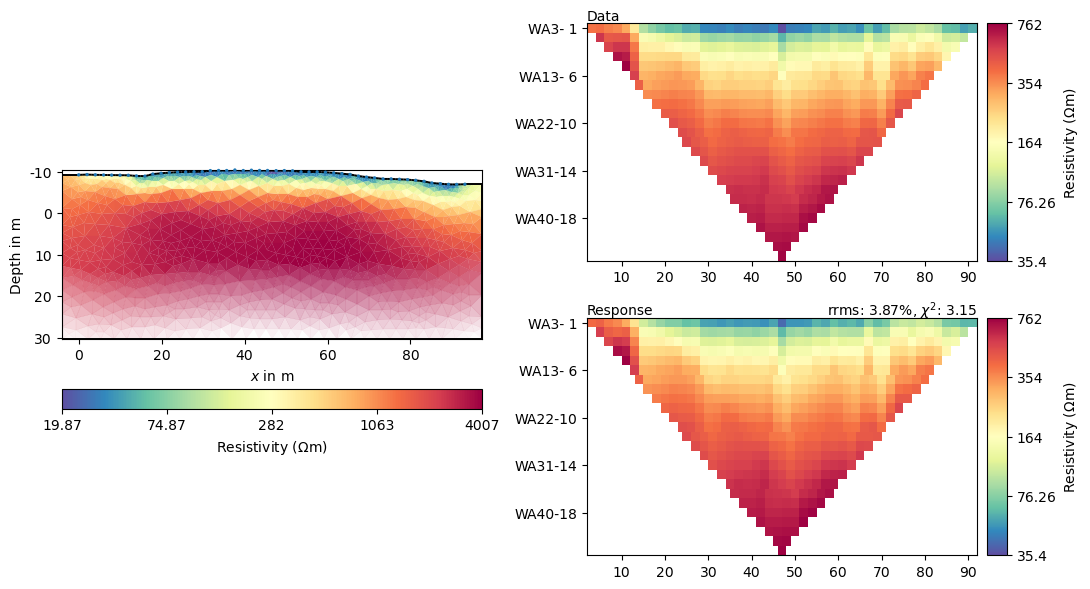

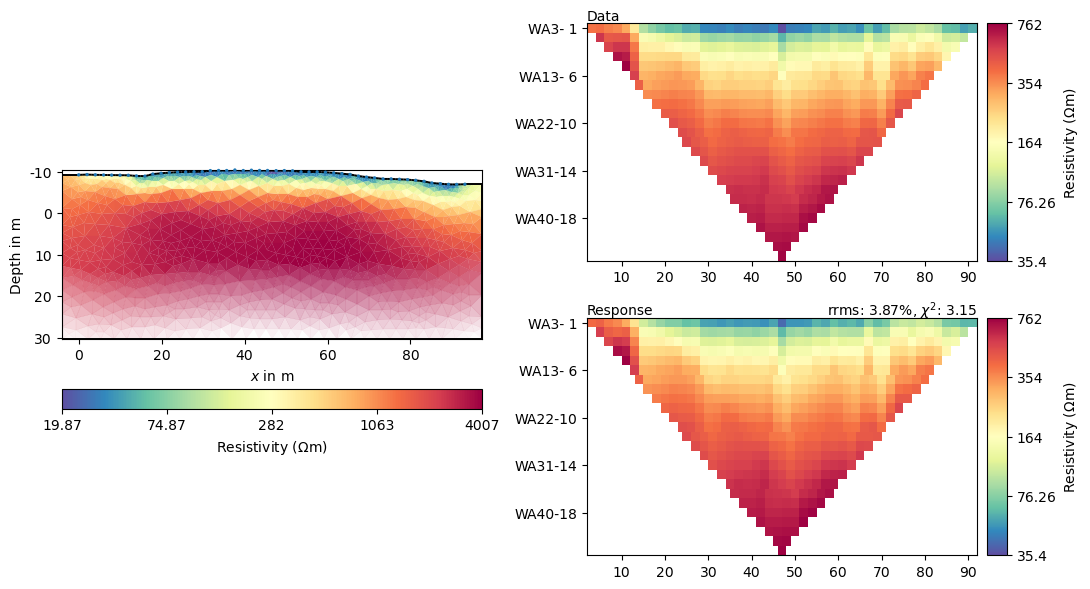

In [27]:
mgr.showResultAndFit()

23/07/25 - 14:56:53 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/inversions/saved/a12_diag1_1\ERTManager


('//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/inversions/saved/a12_diag1_1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

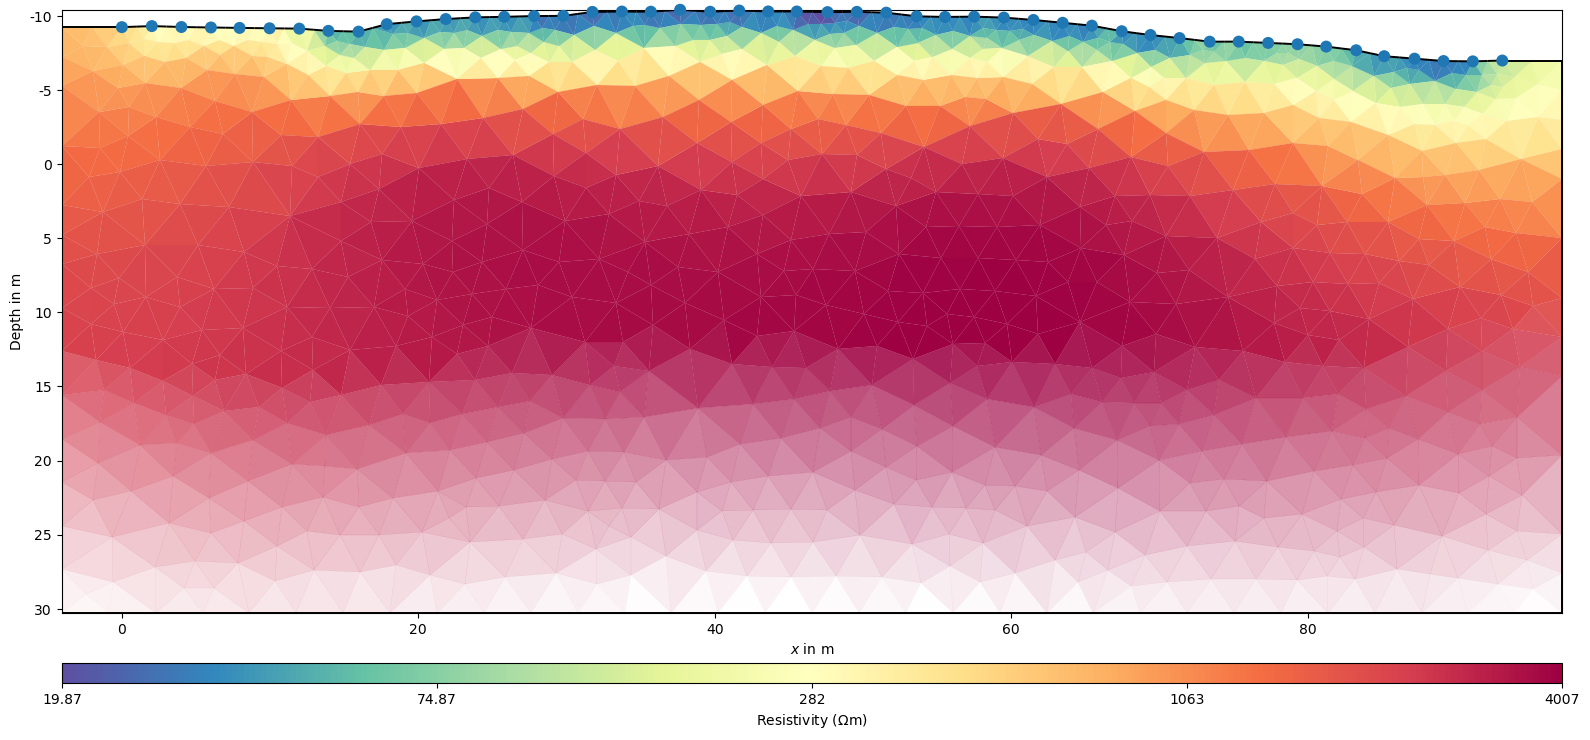

In [28]:
mgr.saveResult(dir + 'inversions/saved/a12_diag1_1')